<h1>Binomni poučak i matematička indukcija u pythonu</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-4.17.19-1-MANJARO-x86_64-with-arch-Manjaro-Linux'

In [3]:
platform.python_version()

'3.7.0'

In [4]:
import sympy as sp

In [5]:
sp.__version__

'1.2'

In [6]:
sp.init_printing()

Funkcija za kontrolirani ispis po retcima

In [7]:
def ispis(objekt,br):
    objekt=str(objekt)
    d=len(objekt)
    red=d // br
    ostatak=d % br
    za_ispis=""
    for k in range(red):
        za_ispis=za_ispis+objekt[k*br:(k+1)*br]+"\n"
    if ostatak == 0:
        za_ispis = za_ispis[:-1]
    else:
        za_ispis = za_ispis+objekt[red*br:]
    print(za_ispis)

<h2>Računanje faktorijela</h2>

$5!=120$

In [8]:
sp.factorial(5)

$0!=1$

In [9]:
sp.factorial(0)

$100!$ jednako je ?? :-)

In [10]:
sp.factorial(100)

In [11]:
sp.pprint(sp.factorial(100))

933262154439441526816992388562667004907159682643816214685929638952175999932299
156089414639761565182862536979208272237582511852109168640000000000000000000000
00


<h2>Računanje binomnih koeficijenata</h2>

$\binom{6}{4}=15$

In [12]:
sp.binomial(6,4)

$\binom{100}{98}=4950$

In [13]:
sp.binomial(100,98)

$\binom{n}{0}=1$

In [14]:
n = sp.symbols('n', integer=True)
sp.binomial(n,0)

$\binom{n}{1}=n$

In [15]:
sp.binomial(n,1)

$\binom{n}{n}=1$

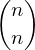

In [16]:
sp.binomial(n,n).expand(func=True)

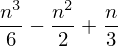

In [17]:
sp.binomial(n,3).expand(func=True)

Svi binomni koeficijenti oblika $\binom{5}{k}$ za $k\in\{0,1,2,3,4,5\}$

In [18]:
sp.binomial_coefficients(5)

In [19]:
sp.binomial_coefficients_list(5)

<h2>Binomni teorem</h2>

In [20]:
sp.var('x y');

$(x+y)^5=x^5+5x^4y+10x^3y^2+10x^2y^3+5xy^4+y^5$

In [21]:
sp.expand((x+y)**5)

$(x+y)^{50}=\cdots\ $  :-)

In [22]:
ispis(sp.expand((x+y)**50),80)

x**50 + 50*x**49*y + 1225*x**48*y**2 + 19600*x**47*y**3 + 230300*x**46*y**4 + 21
18760*x**45*y**5 + 15890700*x**44*y**6 + 99884400*x**43*y**7 + 536878650*x**42*y
**8 + 2505433700*x**41*y**9 + 10272278170*x**40*y**10 + 37353738800*x**39*y**11 
+ 121399651100*x**38*y**12 + 354860518600*x**37*y**13 + 937845656300*x**36*y**14
 + 2250829575120*x**35*y**15 + 4923689695575*x**34*y**16 + 9847379391150*x**33*y
**17 + 18053528883775*x**32*y**18 + 30405943383200*x**31*y**19 + 47129212243960*
x**30*y**20 + 67327446062800*x**29*y**21 + 88749815264600*x**28*y**22 + 10804325
3365600*x**27*y**23 + 121548660036300*x**26*y**24 + 126410606437752*x**25*y**25 
+ 121548660036300*x**24*y**26 + 108043253365600*x**23*y**27 + 88749815264600*x**
22*y**28 + 67327446062800*x**21*y**29 + 47129212243960*x**20*y**30 + 30405943383
200*x**19*y**31 + 18053528883775*x**18*y**32 + 9847379391150*x**17*y**33 + 49236
89695575*x**16*y**34 + 2250829575120*x**15*y**35 + 937845656300*x**14*y**36 + 35
4860518600*x**13*y**37 + 121

<h3>Zadatak</h3>
Pomoću binomnog teorema raspišite izraz $\big(\sqrt[3]{x}+x^2\big)^4$.

In [23]:
sp.expand((x**sp.Rational(1,3)+x**2)**4)

<h3>Zadatak</h3>
Pomoću binomnog teorema raspišite izraz $\big(\sqrt[3]{x}-x^2\big)^4$.

In [24]:
sp.expand((x**sp.Rational(1,3)-x**2)**4)

<h3>Zadatak</h3>
Zadan je binom $\big(\sqrt[3]{x^2}+\sqrt[4]{x^3}\big)^{11}$.
<ul>
    <li>Odredite član uz $x^8$.</li>
    <li>Odredite peti član u razvoju tog binoma</li>
    <li> Da li postoji član koji ne sadrži $x$</li>
</ul>

In [25]:
f=sp.expand((x**sp.Rational(2,3)+x**sp.Rational(3,4))**11)

koeficijent uz $x^8$

In [26]:
f.coeff(x**8)

SymPy ima svoj raspored članova

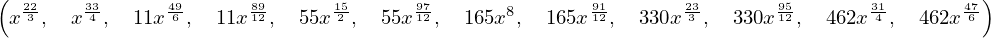

In [27]:
f.args

Stoga je najbolje da definiramo svoju funkciju

In [28]:
def KTIclan(a,b,n,k): 
    return sp.binomial(n,k-1)*a**(n-k+1)*b**(k-1) 

peti član

In [29]:
KTIclan(x**sp.Rational(2,3),x**sp.Rational(3,4),11,5)

Ne postoji član koji ne sadrži $x$, tj. svi članovi sadrže neku potenciju od $x^r$ za $r\neq 0$.

In [30]:
[t.has(x) for t in f.args]

[True, True, True, True, True, True, True, True, True, True, True, True]

<h3>Zadatak</h3>
Pomoću binomnog teorema raspišite i sredite izraz $\left(\frac{1}{\sqrt[4]{y^3}}-\sqrt{y}\right)^4$. 

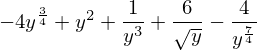

In [31]:
sp.expand((y**sp.Rational(-3,4)-y**sp.Rational(1,2))**4)

<p style="line-height:30px;"><strong>Napomena.</strong> Na Matematici 1 se binomni koeficijent $\binom{n}{k}$ definira samo za $n\in\mathbb{N}$,
$k\in\mathbb{N}\cup\{0\}$ i uz pretpostavku da je $k\leqslant n$. Stoga bi u našem slučaju gornja rješenja $n=0$ i $n=1$ otpala i jednadžba 
ima samo jedno rješenje $n=8$. Međutim, općenito se binomni koeficijent $\binom{\alpha}{k}$ može definirati za $\alpha\in\mathbb{R}$ i 
$k\in\mathbb{N}\cup\{0\}$. Naravno, SymPy zna tu definiciju i zato daje tri korektna rješenja.</p>

$\binom{0}{4}=0$

In [32]:
sp.binomial(0,4)

$\binom{1}{4}=0$

In [33]:
sp.binomial(1,4)

$\displaystyle\binom{-\frac{1}{2}}{5}=-\frac{63}{256}$

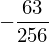

In [34]:
sp.binomial(sp.Rational(-1,2),5)

Općenita definicija binomnog koeficijenta glasi

$$\binom{\alpha}{0}=1,\quad \binom{\alpha}{k}=\frac{\alpha\cdot(\alpha-1)\cdot(\alpha-2)\cdots(\alpha-k+2)\cdot(\alpha-k+1)}{k!},\quad \alpha\in\mathbb{R},\ k\in\mathbb{N}$$

<h2>Matematička indukcija</h2>
Naravno da SymPy nije svjestan principa matematičke indukcije, niti pak računalo može biti tako kreativno i samostalno u donošenju zaključaka kao čovjek. 
Ovdje je namjera da pokažemo kako je SymPy "jako pametan", tj. da "zna računati" sume određenih $n$ brojeva čiju istinitost dokazujemo matematičkom indukcijom. 
Dakle, iako je za otkrivanje formula određenih suma $n$ brojeva potrebna kreativnost, ipak postoje algoritmi koji mogu tu kreativnost automatizirati, 
tako da je i računalo tada "sposobno" otkrivati takve formule.

In [35]:
sp.var('k n');

$1+2+3+\cdots+n=\frac{n(n+1)}{2}$

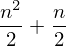

In [36]:
sp.summation(k,(k,1,n))

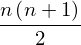

In [37]:
sp.summation(k,(k,1,n)).factor()

$1^2+2^2+3^2+\cdots+n^2=\frac{1}{6}n(n+1)(2n+1)$

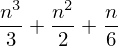

In [38]:
sp.summation(k**2,(k,1,n))

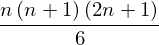

In [39]:
sp.summation(k**2,(k,1,n)).factor()

$1^3+2^3+3^3+\cdots+n^3=\frac{n^2(n+1)^2}{4}$

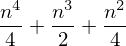

In [40]:
sp.summation(k**3,(k,1,n))

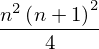

In [41]:
sp.summation(k**3,(k,1,n)).factor()

$1+3+5+\cdots+(2n-1)=n^2$

In [42]:
sp.summation(2*k-1,(k,1,n))

$4+20+48+\cdots+2n(3n-1)=2n^2(n+1)$

In [43]:
sp.summation(2*k*(3*k-1),(k,1,n))

In [44]:
sp.summation(2*k*(3*k-1),(k,1,n)).factor()

$\displaystyle\sum_{k=0}^n{\big(6k^2-4k^3\big)}=n(n+1)(1+n-n^2)$

In [45]:
sp.summation(6*k**2-4*k**3,(k,1,n))

In [46]:
sp.summation(6*k**2-4*k**3,(k,1,n)).factor()

Iako na računalu ne možemo provesti matematičku indukciju, možemo provesti nepotpunu indukciju, tj. tvrdnju provjeriti za puno prirodnih brojeva. 
Naravno, to nije dokaz, nego samo eksperiment, a matematika eksperiment ne priznaje kao dokaz.

$19\mid 7\cdot 5^{2n}+12\cdot 6^n$

Napravimo listu brojeva oblika $7\cdot 5^{2n}+12\cdot 6^n$ za $n\in\{1,2,3,\ldots,99,100\}$.
Vidimo da ti brojevi brzo rastu, a to je zbog toga što eksponencijalna funkcija brzo raste.

In [47]:
ispis([7*5**(2*n)+12*6**n for n in range(1,101)],120)

[247, 4807, 111967, 2749927, 68452687, 1709544247, 42727968607, 1068135389767, 26703001791727, 667572747078487, 16689304
890674047, 417232539549122407, 10430812992421687567, 260770321832703953527, 6519258027950569424287, 16298145059156205912
3847, 4074536264145838419196207, 101863406599786682126505367, 2546585164971511383042235327, 6366462912414885055533349008
7, 1591615728102887659759002893647, 39790393202567189869229066190007, 994759830064149736982250617843167, 248689957516035
63366065409224637127, 621724893790088003800690093287275887, 15543122344752193612911581508209983447, 38857805861880480143
0155512761418103807, 9714451465470119802398083669372463700967, 242861286636752993659817266836333659158927, 6071532165918
824833094622721520473878781687, 151788304147970620776960714341684641368393247, 37947076036992655191215887363641528006029
37607, 94867690092481637976225143676036040613432078767, 2371692252312040949394741143502494338925953800727, 5929230630780
10237348032038971719184146897560

Pogledajmo ostake koje daju prvih $100$ brojeva oblika $7\cdot 5^{2n}+12\cdot 6^n$ pri dijeljenju s $19$.

In [48]:
ispis([(7*5**(2*n)+12*6**n)%19 for n in range(1,101)],80)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Možemo tvrdnju provjeriti i za prvih $1000$ brojeva oblika $7\cdot 5^{2n}+12\cdot 6^n$

In [49]:
ispis([(7*5**(2*n)+12*6**n)%19 for n in range(1,1001)],80) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Dakle, za prvih $1000$ prirodnih brojeva vrijedi tvrdnja $19\mid 7\cdot 5^{2n}+12\cdot 6^n$. 
Međutim, to još uvijek nije dokaz da tvrdnja vrijedi za svaki prirodni broj $n$, iako je ona provjerena za "puno" prirodnih brojeva.

<h3>Eulerovi prosti brojevi</h3>
Brojevi oblika $n^2+n+41$ su prosti za svaki $n\in\mathbb{N}$.

U današnje vrijeme, kada imamo tako jaka računala i tako prekrasne besplatne alate kao što je Python i SymPy, 
Eulerovu tvrdnju je lako opovrgnuti, tj. dokazati da ona nije istinita.

Prvih $39$ takvih brojeva

In [50]:
ispis([n**2+n+41 for n in range(1,40)],80)

[43, 47, 53, 61, 71, 83, 97, 113, 131, 151, 173, 197, 223, 251, 281, 313, 347, 3
83, 421, 461, 503, 547, 593, 641, 691, 743, 797, 853, 911, 971, 1033, 1097, 1163
, 1231, 1301, 1373, 1447, 1523, 1601]


jesu zaista prosti

In [51]:
ispis([sp.isprime(n**2+n+41) for n in range(1,40)],80)

[True, True, True, True, True, True, True, True, True, True, True, True, True, T
rue, True, True, True, True, True, True, True, True, True, True, True, True, Tru
e, True, True, True, True, True, True, True, True, True, True, True, True]


No, za $n=40$ i $n=41$ brojevi oblika $n^2+n+41$ su složeni

In [52]:
[sp.isprime(n**2+n+41) for n in [40,41]]

[False, False]

No, ima još dosta $n$-ova za koje su brojevi oblika $n^2+n+41$ složeni. Pogledajmo koliko među prvih $1000$ brojeva tog oblika ima složenih.

In [53]:
lista1000=[sp.isprime(n**2+n+41) for n in range(1,1001)] 
ispis(lista1000,80)

[True, True, True, True, True, True, True, True, True, True, True, True, True, T
rue, True, True, True, True, True, True, True, True, True, True, True, True, Tru
e, True, True, True, True, True, True, True, True, True, True, True, True, False
, False, True, True, False, True, True, True, True, False, True, True, True, Tru
e, True, True, False, True, True, True, True, True, True, True, True, False, Tru
e, True, True, True, True, True, True, True, True, True, False, True, True, True
, True, False, False, True, False, True, True, False, True, False, True, False, 
True, True, True, True, False, True, True, True, True, True, False, True, False,
 True, True, True, True, False, True, True, True, True, True, True, True, False,
 True, True, True, False, False, False, True, True, False, False, True, True, Fa
lse, True, True, True, True, True, False, True, False, True, False, True, True, 
False, True, True, True, False, True, True, True, True, True, True, True, False,
 True, True, True, False, Tr

Vidimo da na dosta mjesta piše False, što znači da je broj složen, tj. da nije prost. 
No, da mi ručno ne brojimo koliko ih stvarno ima, neka Python to prebroji.

In [54]:
lista1000.count(False)

Dakle, među prvih $1000$ brojeva oblika $n^2+n+41$, čak njih $419$ su složeni, tj. nisu prosti. Ugrubo rečeno, 
među prvih $1000$ takvih brojeva, oko $40\%$ njih su složeni brojevi, a to je dosta daleko od Eulerove hipoteze 
da su svi oni prosti. Eh, da je Euler imao današnja računala i Python, ne bi napravio takvu pogrešku. No, lako je sada biti pametan. :-)